#			ECG Assignment Solution :

####1) A figure showing the first 2000 samples of the ECG signal before and after noise filtering. Name the figure “Before_After_Filter.jpg”

First import The Class ECG_Processing that handles all the required functions, and plot function that plots the data as required

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


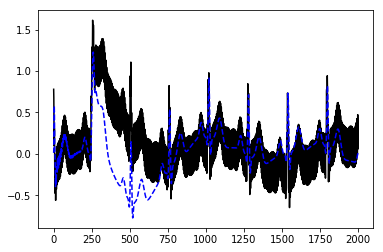

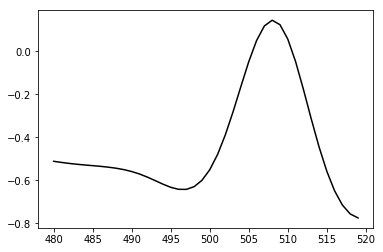

In [34]:
import matplotlib.pyplot as plt
from ECG_processing import ECG_Processing
from plotting import plot

%matplotlib inline

#Create instance from class 
ecg = ECG_Processing(dataFile='DataN.txt',fs=256)
#initialize counter for plotted figures
plot.counter = 0
plot(signal=ecg.signal_init,start=0,end=2000)
#plot the filtered signal in dashed blue
plt.plot(ecg.noise_filtering()[:2000], linestyle='--', color='b')
plt.savefig('Before_After_Filter.png',bbox_inches='tight')
#Additionally plotting one QRS wave
plot(ecg.signal_filtered,start=480,end=520)

%load_ext autoreload
%autoreload 2

####2) A figure showing the first 2000 samples of the ECG signal with an “*” marking the detected R waves for N= 5. Name the figure “DetectedR_5.jpg”

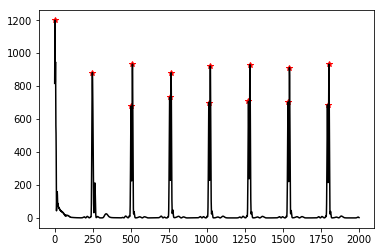

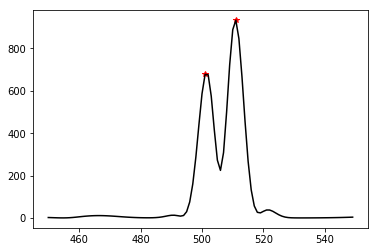

In [27]:
final_sig, time_stamps = ecg.process_signal(N=5)
plot(final_sig,time_stamps,end=2000)
plt.savefig('DetectedR_5.png',bbox_inches='tight')
#Additionally plotting one QRS wave
plot(final_sig,time_stamps,start=450,end=550)

####3) A figure showing the first 2000 samples of the ECG signal with an “*” marking the detected R waves for N= 15. Name the figure “DetectedR_15.jpg”

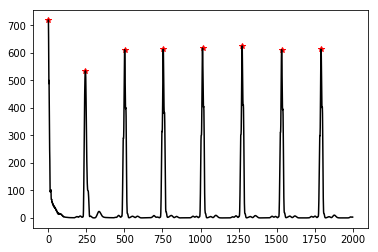

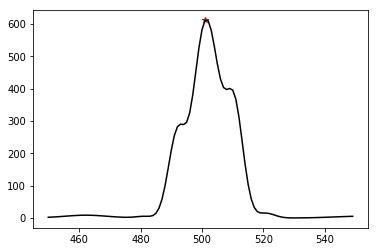

In [28]:
final_sig, time_stamps = ecg.process_signal(N=15)
plot(final_sig,time_stamps,start=0,end=2000)
plt.savefig('DetectedR_15.png',bbox_inches='tight')
plot(final_sig,time_stamps,start=450,end=550)

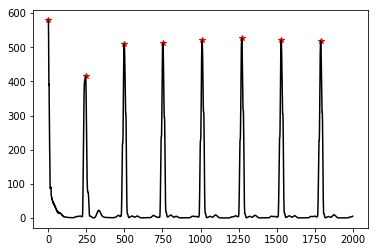

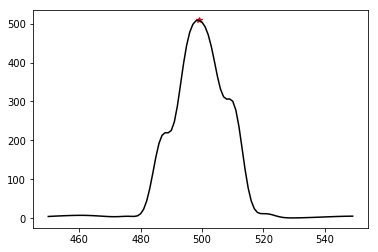

In [29]:
#Additionallly plotting for N=20
final_sig, time_stamps = ecg.process_signal(N=20)
plot(final_sig,time_stamps,start=0,end=2000)
plot(final_sig,time_stamps,start=450,end=550)

####4) A figure showing the first 2000 samples of the ECG signal with an “*” marking the detected R waves for N= 25. Name the figure “DetectedR_25.jpg”

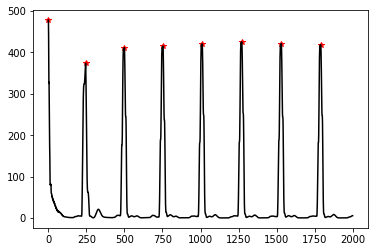

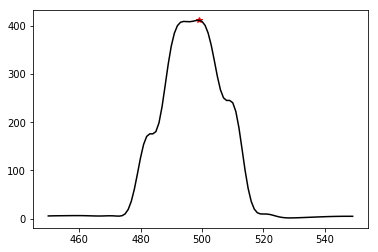

In [30]:
final_sig, time_stamps = ecg.process_signal(N=25)
plot(final_sig,time_stamps,end=2000)
plt.savefig('DetectedR_25.png',bbox_inches='tight')
plot(final_sig,time_stamps,start=450,end=550)

####5) What you can conclude about the optimal setting of N?

Answer : A 15 to 20 samples window seems to be most precise, as that number increase the width of the given QRS signal increases, so the detection of R wouldn't be precise, and as the number decreases the QRS is not smoothed well enough into one peak.
The number seems to be the same of the width of the QRS signal.

####6) A figure showing the first 2000 samples of the ECG signal with an “*” marking the detected R waves for N= 25 But without noise filtering. Name the figure “Unfiltered_25.jpg”

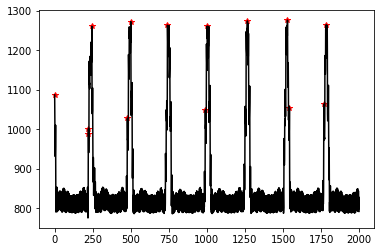

In [31]:
final_sig, time_s = ecg.process_signal(N=25,noise=1)
plot(final_sig,time_s,end=2000)
plt.savefig("Unfiltered_25.png",bbox_inches='tight')

####7) A plot of the RR intervals with Beat number on the x-axis and RR interval in msec on the y-axis in the case of N= 25. Name the figure “RR.jpg”

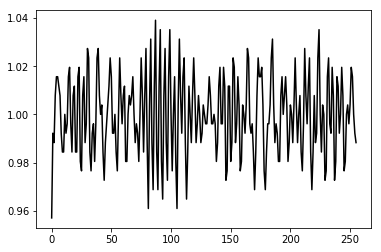

In [32]:
final_sig, time_stamps = ecg.process_signal(N=25)
RR_intervals = ecg.RR_compute(time_stamps)
plot(RR_intervals)
plt.savefig('RR.png',bbox_inches='tight')

####Q2 )
####A  text  file  that  shows  the  timestamps  of  missing  beat(s)  (the  sample  number  at  which  the  R  wave  should have been present). Name your file “MissingBeats.txt”

In [35]:
ecg2 = ECG_Processing("Data2.txt")
signal, time_stamps = ecg2.process_signal(15)
RR_intervals = ecg2.RR_compute(time_stamps)
missing_beats = ecg.sinus_arrest_detect(RR_intervals,time_stamps)
file = open("MissingBeats.txt", 'w')
for beat in missing_beats:
    file.write(str(beat)+"\n")
file.close()
print(missing_beats)

[  4.296875     9.41015625  20.5625    ]
